## Objective : To predict the Temperature based on the input features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [107]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Classes  '>

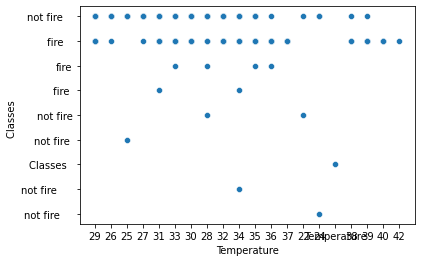

In [108]:
sns.scatterplot(df['Temperature'],df['Classes  '])

###  since there is no correlation between temperature and classes we can drop the classes column

In [109]:
df.drop('Classes  ',axis=1,inplace=True)

In [110]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [111]:
df['Temperature_Value']=df['Temperature']
df.drop('Temperature',axis=1,inplace=True)

In [112]:
df

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
0,01,06,2012,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,29
1,02,06,2012,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,29
2,03,06,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26
3,04,06,2012,89,13,2.5,28.6,1.3,6.9,0,1.7,0,25
4,05,06,2012,77,16,0,64.8,3,14.2,1.2,3.9,0.5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5,30
242,27,09,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,28
243,28,09,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,27
244,29,09,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,24


In [113]:
df[df.isnull().any(axis=1)]

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#Removing the row 122
df.drop(122,inplace=True)

In [115]:
df.isnull().sum()

day                  0
month                0
year                 0
 RH                  0
 Ws                  0
Rain                 0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
BUI                  0
FWI                  0
Temperature_Value    0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 245
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   day                245 non-null    object
 1   month              245 non-null    object
 2   year               245 non-null    object
 3    RH                245 non-null    object
 4    Ws                245 non-null    object
 5   Rain               245 non-null    object
 6   FFMC               245 non-null    object
 7   DMC                245 non-null    object
 8   DC                 245 non-null    object
 9   ISI                245 non-null    object
 10  BUI                245 non-null    object
 11  FWI                245 non-null    object
 12  Temperature_Value  245 non-null    object
dtypes: object(13)
memory usage: 26.8+ KB


In [117]:
df.iloc[121:]

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
121,30,09,2012,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,25
123,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature
124,01,06,2012,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,32
125,02,06,2012,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,30
126,03,06,2012,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5,30
242,27,09,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,28
243,28,09,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,27
244,29,09,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,24


In [118]:
#removing the row 123
df.drop(123,inplace=True)

In [119]:
df.columns

Index(['day', 'month', 'year', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Temperature_Value'],
      dtype='object')

In [120]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Temperature_Value'],
      dtype='object')

In [135]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i])

In [134]:
df.iloc[160:166]

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
162,9,7,2012,43,15,1.9,82.3,9.4,9.9,3.2,9,3.1,36
163,10,7,2012,51,16,3.8,77.5,8.0,9.5,2,7.7,1.3,34
166,13,7,2012,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,39
168,15,7,2012,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,34
169,16,7,2012,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,31
170,17,7,2012,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,32


In [133]:
df.drop(167,inplace=True)

In [123]:
df.columns

Index(['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Temperature_Value'],
      dtype='object')

In [139]:
df[['day', 'month', 'year']]=df[['day', 'month', 'year']].astype(int)

In [140]:
df[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Temperature_Value']]=df[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Temperature_Value']].astype(float)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 245
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                241 non-null    int32  
 1   month              241 non-null    int32  
 2   year               241 non-null    int32  
 3   RH                 241 non-null    float64
 4   Ws                 241 non-null    float64
 5   Rain               241 non-null    float64
 6   FFMC               241 non-null    float64
 7   DMC                241 non-null    float64
 8   DC                 241 non-null    float64
 9   ISI                241 non-null    float64
 10  BUI                241 non-null    float64
 11  FWI                241 non-null    float64
 12  Temperature_Value  241 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 23.5 KB


In [143]:
df

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,29.0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,29.0
2,3,6,2012,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26.0
3,4,6,2012,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,25.0
4,5,6,2012,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,30.0
242,27,9,2012,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,28.0
243,28,9,2012,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,27.0
244,29,9,2012,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,24.0


In [144]:
df.corr()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
day,1.000000,-0.002182,NaN,-0.079456,0.045968,-0.111212,0.226582,0.490737,0.526679,0.181033,0.516155,0.350453,0.100639
month,-0.002182,1.000000,NaN,-0.044489,-0.041981,0.036236,0.018280,0.066592,0.124146,0.066030,0.083385,0.081922,-0.054037
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,-0.079456,-0.044489,NaN,1.000000,0.240496,0.223616,-0.644158,-0.412172,-0.232890,-0.687843,-0.358171,-0.583639,-0.649261
Ws,0.045968,-0.041981,NaN,0.240496,1.000000,0.171644,-0.164101,-0.001799,0.076495,0.011173,0.029923,0.033126,-0.281514
Rain,-0.111212,0.036236,NaN,0.223616,0.171644,1.000000,-0.543952,-0.287335,-0.296772,-0.344648,-0.298386,-0.321579,-0.328907
FFMC,0.226582,0.018280,NaN,-0.644158,-0.164101,-0.543952,1.000000,0.605150,0.510892,0.739502,0.594110,0.691470,0.676287
DMC,0.490737,0.066592,NaN,-0.412172,-0.001799,-0.287335,0.605150,1.000000,0.876089,0.681548,0.982261,0.876200,0.489552
DC,0.526679,0.124146,NaN,-0.232890,0.076495,-0.296772,0.510892,0.876089,1.000000,0.510804,0.942064,0.740457,0.382826
ISI,0.181033,0.066030,NaN,-0.687843,0.011173,-0.344648,0.739502,0.681548,0.510804,1.000000,0.645471,0.923115,0.605082


In [145]:
#droping the year column as the data is of the same year
df.drop('year',axis=1,inplace=True)

In [146]:
df.corr()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature_Value
day,1.000000,-0.002182,-0.079456,0.045968,-0.111212,0.226582,0.490737,0.526679,0.181033,0.516155,0.350453,0.100639
month,-0.002182,1.000000,-0.044489,-0.041981,0.036236,0.018280,0.066592,0.124146,0.066030,0.083385,0.081922,-0.054037
RH,-0.079456,-0.044489,1.000000,0.240496,0.223616,-0.644158,-0.412172,-0.232890,-0.687843,-0.358171,-0.583639,-0.649261
Ws,0.045968,-0.041981,0.240496,1.000000,0.171644,-0.164101,-0.001799,0.076495,0.011173,0.029923,0.033126,-0.281514
Rain,-0.111212,0.036236,0.223616,0.171644,1.000000,-0.543952,-0.287335,-0.296772,-0.344648,-0.298386,-0.321579,-0.328907
FFMC,0.226582,0.018280,-0.644158,-0.164101,-0.543952,1.000000,0.605150,0.510892,0.739502,0.594110,0.691470,0.676287
DMC,0.490737,0.066592,-0.412172,-0.001799,-0.287335,0.605150,1.000000,0.876089,0.681548,0.982261,0.876200,0.489552
DC,0.526679,0.124146,-0.232890,0.076495,-0.296772,0.510892,0.876089,1.000000,0.510804,0.942064,0.740457,0.382826
ISI,0.181033,0.066030,-0.687843,0.011173,-0.344648,0.739502,0.681548,0.510804,1.000000,0.645471,0.923115,0.605082
BUI,0.516155,0.083385,-0.358171,0.029923,-0.298386,0.594110,0.982261,0.942064,0.645471,1.000000,0.858453,0.464459


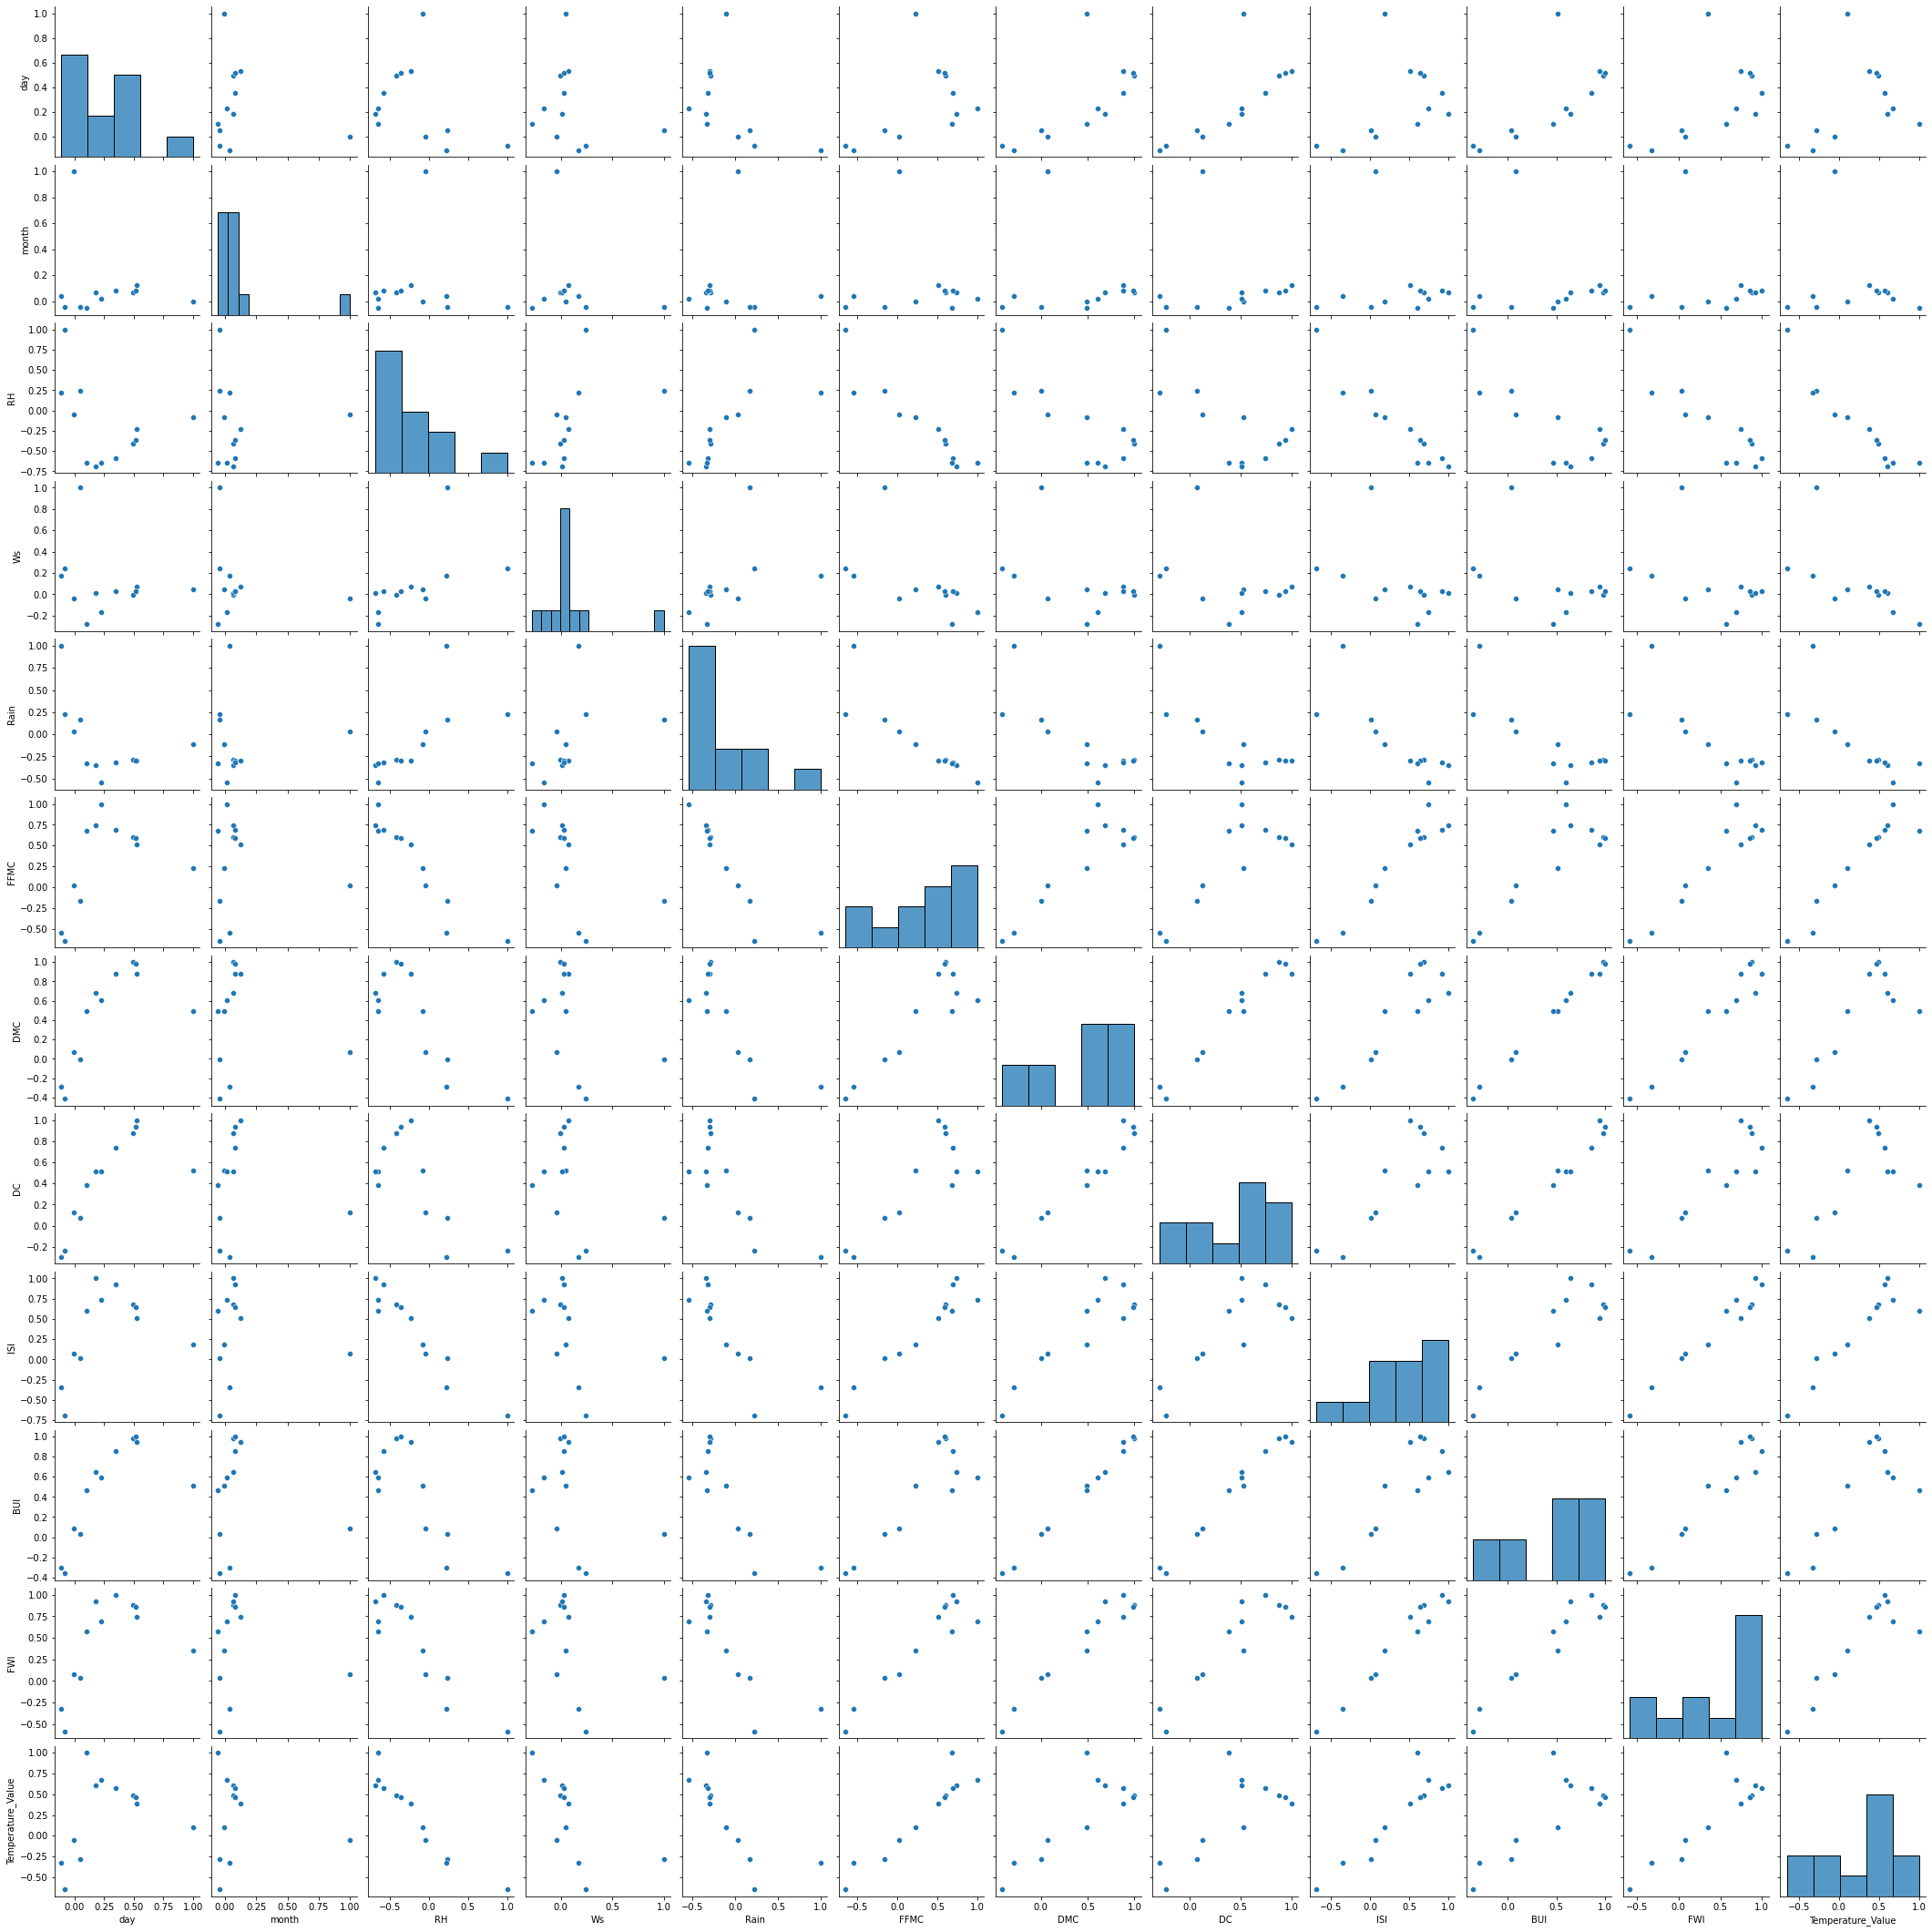

In [147]:
sns.pairplot(df.corr())

<AxesSubplot:>

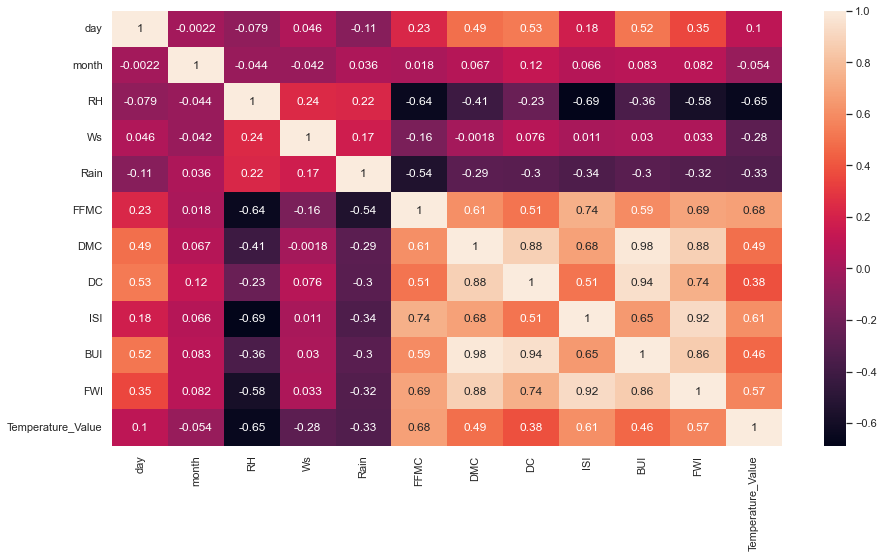

In [150]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True)

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC', ylabel='BUI'>

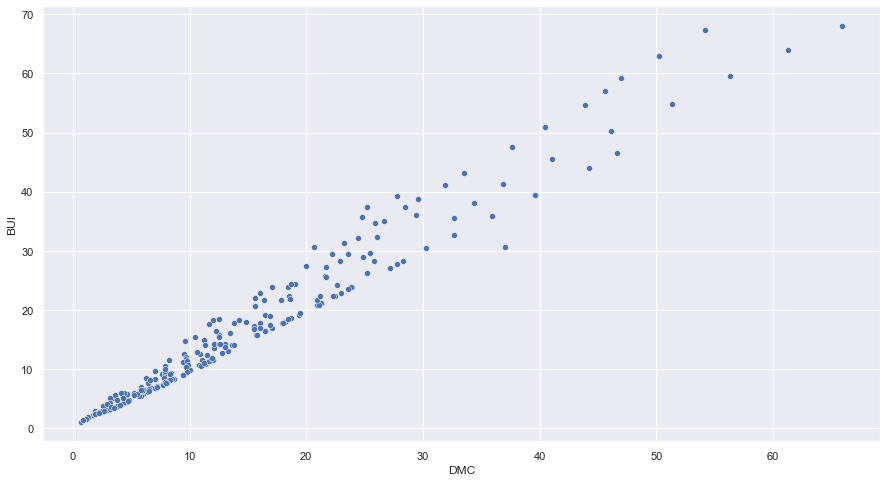

In [151]:
sns.scatterplot(df['DMC'],df['BUI'])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUI', ylabel='DC'>

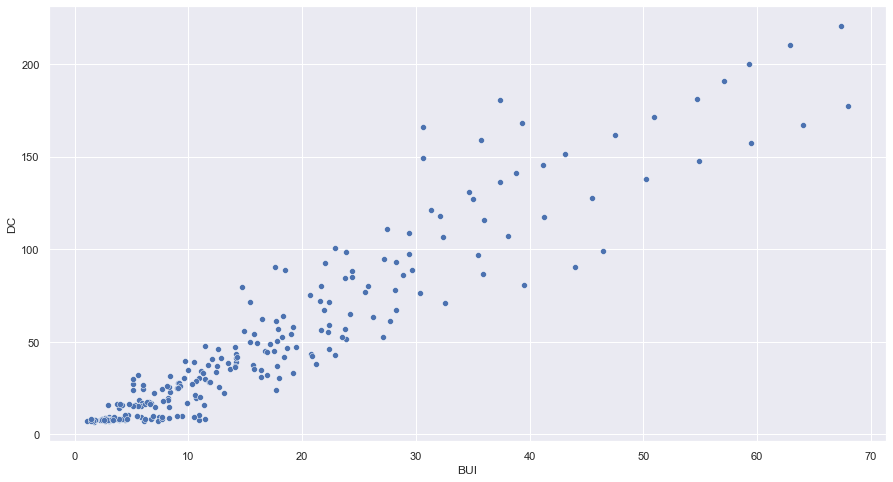

In [152]:
sns.scatterplot(df['BUI'],df['DC'])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC', ylabel='BUI'>

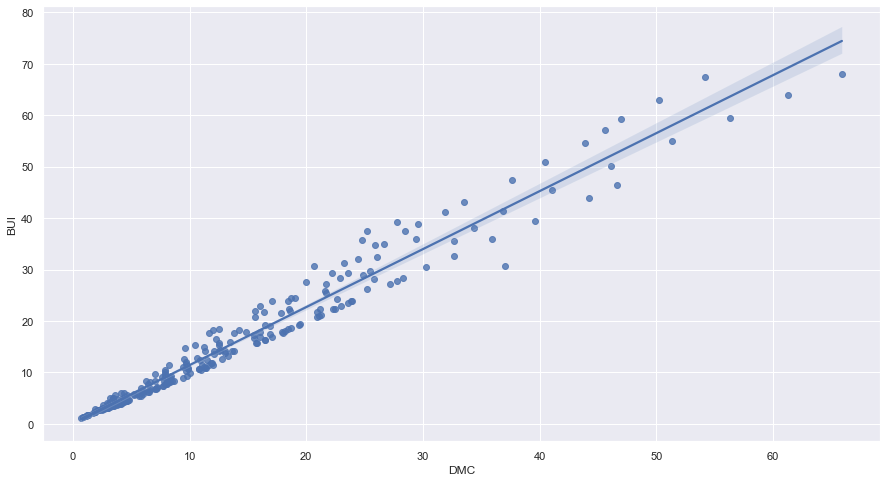

In [153]:
sns.regplot(df['DMC'],df['BUI'])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUI'>

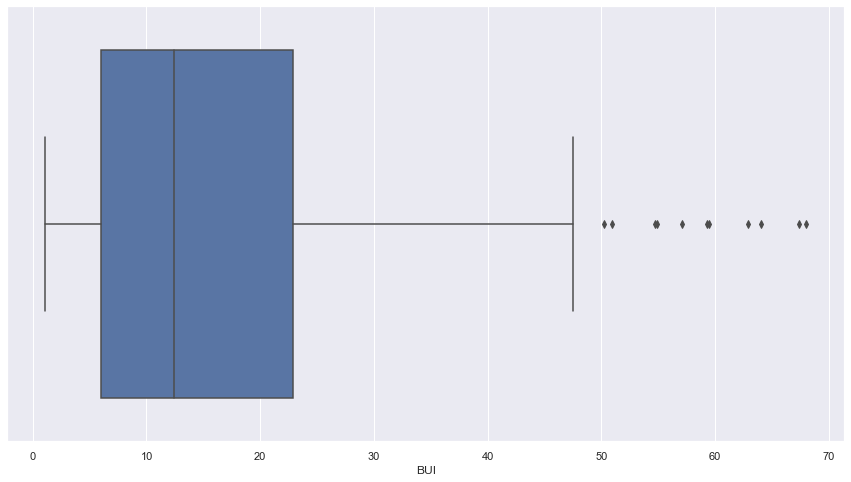

In [154]:
sns.boxplot(df['BUI'])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC'>

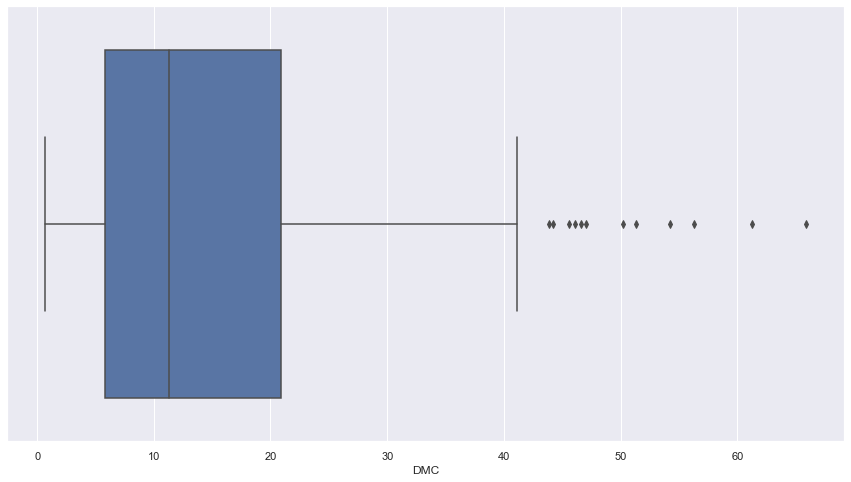

In [155]:
sns.boxplot(df['DMC'])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DC'>

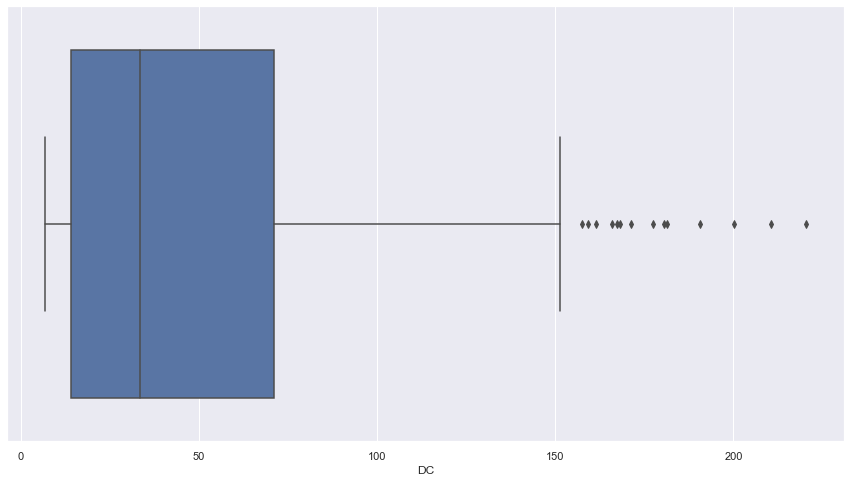

In [156]:
sns.boxplot(df["DC"])

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value'>

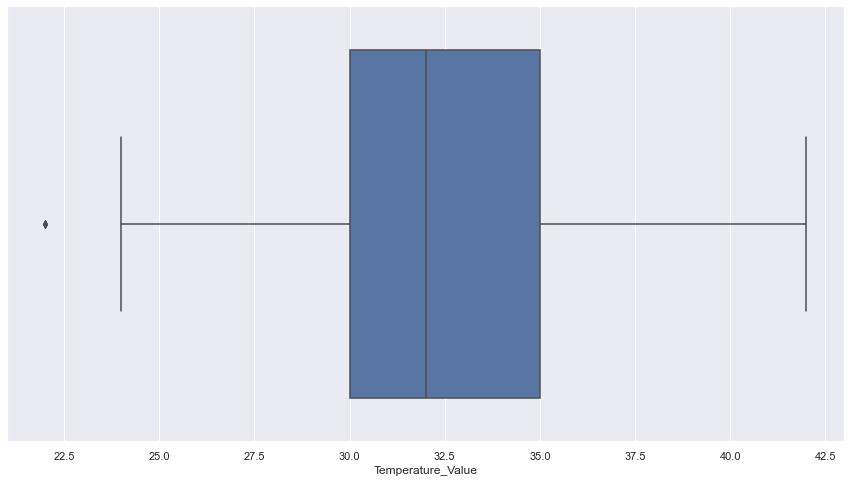

In [159]:
sns.boxplot(df['Temperature_Value'])

In [160]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [161]:
x

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [162]:
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature_Value, Length: 241, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [178]:
x_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
148,25,6,70.0,16.0,0.0,86.0,12.8,25.6,5.4,12.7,6.7
229,14,9,81.0,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7
65,5,8,65.0,13.0,0.0,86.8,11.1,29.7,5.2,11.5,6.1
172,19,7,58.0,16.0,0.0,88.1,27.8,61.1,7.3,27.7,13.0
209,25,8,40.0,18.0,0.0,92.1,56.3,157.5,14.3,59.5,31.1
...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,15,6,80.0,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,1,9,76.0,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0.1
184,31,7,55.0,15.0,0.0,89.3,28.3,67.2,8.3,28.3,14.5


In [179]:
x_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
24,25,6,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4
6,7,6,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2
227,12,9,72.0,14.0,0.0,84.2,8.3,25.2,3.8,9.1,3.9
213,29,8,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9
241,26,9,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...
114,23,9,54.0,11.0,0.5,73.7,7.9,30.4,1.2,9.6,0.7
182,29,7,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,10.9
5,6,6,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5
56,27,7,48.0,13.0,0.0,90.3,22.2,108.5,8.7,29.4,15.3


In [180]:
#Standardization or feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [182]:
linear.fit(x_train,y_train)

LinearRegression()

In [183]:
linear.coef_

array([-0.56653476, -0.32243093, -1.0925614 , -0.80981146,  0.30737705,
        1.41242497,  2.703284  ,  1.95702458,  0.30774934, -3.6333234 ,
       -0.10320527])

In [184]:
linear.intercept_

32.09316770186335

In [185]:
linear_pred=linear.predict(x_test)

In [186]:
linear_pred

array([32.95776962, 35.2506064 , 31.76483223, 33.33165972, 31.99545873,
       32.37077479, 37.5580341 , 28.59717466, 31.86755997, 30.7565763 ,
       28.24495063, 38.06170151, 34.5084173 , 35.27615351, 34.19315126,
       30.89557837, 31.83579159, 26.06987426, 32.80880849, 35.2082879 ,
       30.83284382, 28.39334184, 33.31620714, 28.99812719, 36.99840314,
       34.97681441, 33.65757274, 33.60883464, 26.50281845, 33.38396709,
       29.49715877, 32.14556368, 32.29944325, 33.1023402 , 32.10876322,
       33.03036027, 30.90140036, 34.59133804, 26.78972536, 20.74762974,
       34.32126966, 32.67940656, 34.33195114, 25.22358214, 36.63691374,
       32.75995053, 36.194112  , 30.75417549, 33.36175659, 28.147977  ,
       37.63909084, 30.67570257, 34.05270924, 34.90036437, 33.29536179,
       32.32157902, 32.81921836, 32.72080636, 35.15398122, 36.53848241,
       34.6084537 , 29.71286325, 30.76171164, 37.10062751, 31.48069476,
       31.53039751, 33.24426548, 30.64042606, 35.33809612, 24.20

### Assumptions

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value'>

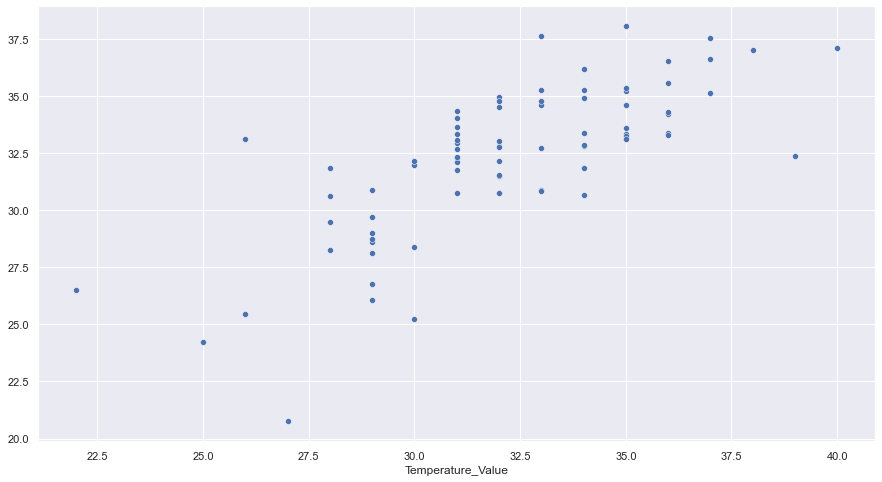

In [187]:
sns.scatterplot(y_test,linear_pred)

In [188]:
linear_residuals=y_test-linear_pred

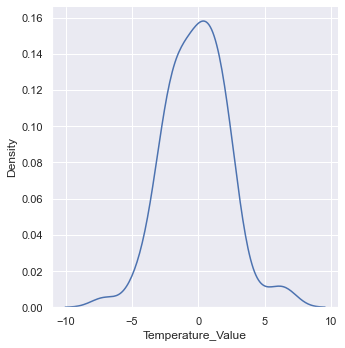

In [191]:
sns.displot(linear_residuals,kind='kde')

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value', ylabel='Temperature_Value'>

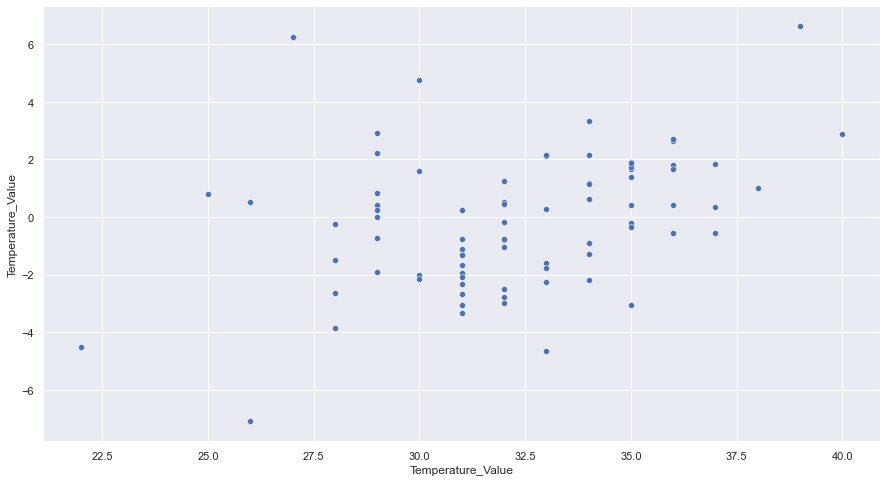

In [219]:
sns.scatterplot(y_test,linear_residuals)

###  R square and Adjusted R square

In [193]:
from sklearn.metrics import r2_score
score=r2_score(y_test,linear_pred)

In [194]:
score

0.4857993269661697

In [196]:
#Adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.40261980632834415

### Ridge Regression

In [200]:
from sklearn.linear_model import Ridge

In [201]:
ridge=Ridge()

In [203]:
ridge.fit(x_train,y_train)

Ridge()

In [205]:
ridge_pred=ridge.predict(x_test)

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value'>

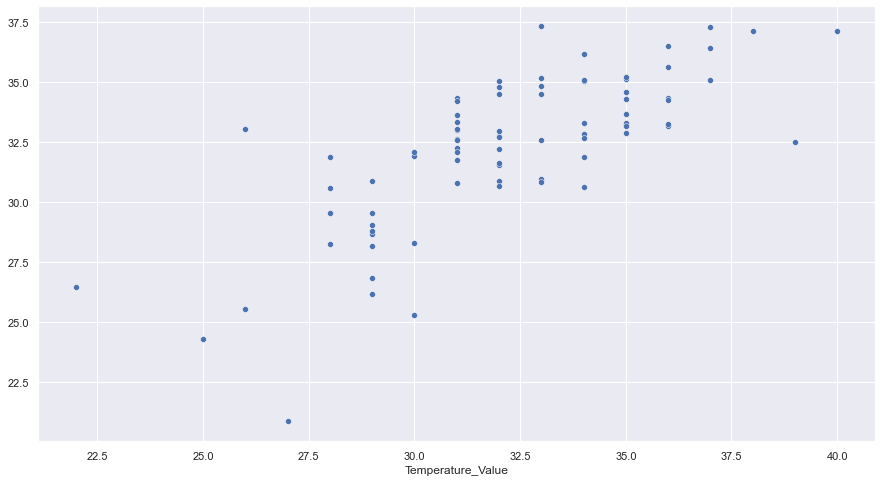

In [206]:
sns.scatterplot(y_test,ridge_pred)

In [207]:
residuals=y_test-ridge_pred

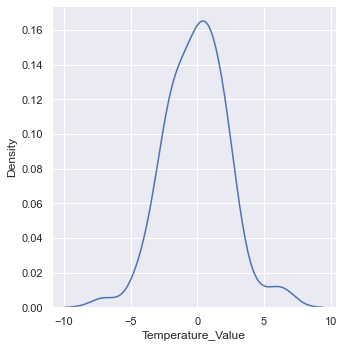

In [209]:
sns.displot(residuals,kind='kde')

In [211]:
score=r2_score(y_test,ridge_pred)

In [212]:
score

0.504030137752923

In [213]:
#Adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.42379971886001355

### Lasso Regression

In [214]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [215]:
lasso.fit(x_train,y_train)

Lasso()

In [217]:
lasso_pred=lasso.predict(x_test)

In [218]:
lasso_pred

array([32.73921717, 33.36898649, 32.1337006 , 32.79437563, 32.58627387,
       31.73002913, 34.71731662, 30.09889494, 30.91445735, 32.76034628,
       31.02124493, 32.56241744, 33.56182887, 33.70342906, 33.38815277,
       32.01753272, 31.46052163, 27.49964196, 32.15208363, 33.01694415,
       31.50549779, 29.8149113 , 33.43235505, 30.43764071, 34.78068518,
       33.934604  , 32.5158654 , 32.81392885, 27.21527139, 32.99269141,
       31.4875017 , 31.4350987 , 32.74704034, 32.77833299, 32.66842177,
       32.19316226, 31.71398649, 33.44252797, 28.48614377, 28.36879632,
       32.86400084, 32.88395038, 33.28645165, 27.59351992, 34.37583415,
       32.46735991, 34.21780438, 30.96179264, 33.32126426, 31.24851297,
       34.5530302 , 30.64377965, 34.17164865, 32.91132676, 33.49846031,
       31.95141809, 32.6856346 , 33.16049779, 34.1348826 , 34.63282834,
       33.62950064, 31.37407052, 30.85657157, 35.01694658, 32.19316226,
       32.89060335, 33.05019025, 31.24734278, 34.4016534 , 28.02

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value'>

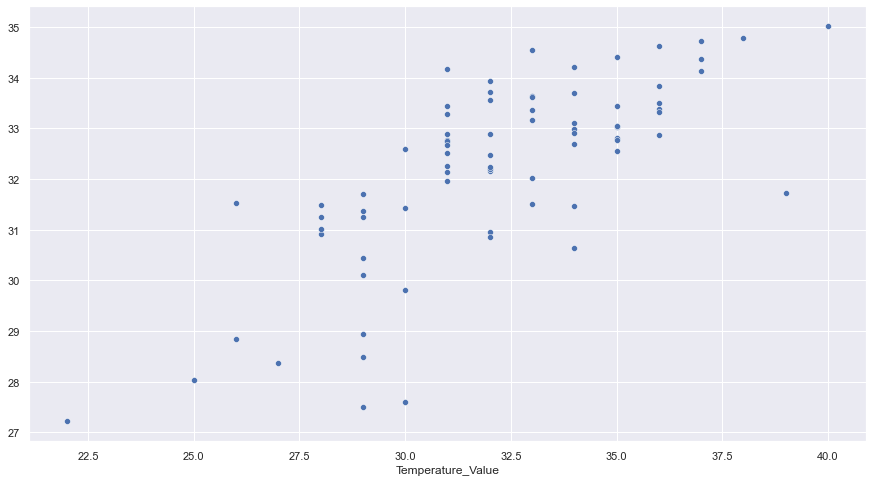

In [220]:
sns.scatterplot(y_test,lasso_pred)

In [221]:
residuals=y_test-lasso_pred

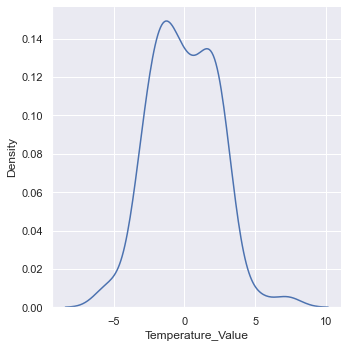

In [223]:
sns.displot(residuals,kind='kde')

In [224]:
score=r2_score(y_test,lasso_pred)

In [225]:
score

0.5040315570660829

In [226]:
#Adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4238013677679493

### Elastic Net 

In [227]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()

In [228]:
en.fit(x_train,y_train)

ElasticNet()

In [229]:
en_pred=en.predict(x_test)

In [230]:
en_pred

array([32.69677304, 33.38811896, 31.94284599, 32.45273522, 32.55351538,
       32.0182891 , 35.98962869, 30.05948651, 30.99777149, 31.98415075,
       30.07263118, 32.69200214, 33.74660051, 34.0736411 , 33.85673305,
       31.52092375, 31.37801914, 28.23809472, 32.17487988, 32.97114684,
       30.94858045, 29.69874343, 33.25136808, 29.93753335, 35.60123913,
       34.80003041, 32.40481996, 32.89274529, 27.85687858, 32.50844837,
       31.15801004, 31.45613798, 32.57616553, 33.06035303, 32.06080572,
       31.84392023, 31.21945416, 33.35310916, 28.76974621, 27.24929876,
       32.90053889, 32.76166834, 33.57827561, 27.98335665, 34.95502419,
       32.33755089, 35.03234244, 30.88183699, 33.51114794, 30.59673994,
       35.91305815, 30.56527116, 34.13514402, 33.89290735, 33.48405064,
       32.21714853, 32.1169838 , 33.05125443, 34.08162775, 35.11545998,
       33.29474581, 30.61712751, 30.76530692, 35.88510691, 31.58614612,
       32.46754271, 32.89164135, 30.71561733, 34.2600986 , 27.80

C:\Users\Govardhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_Value'>

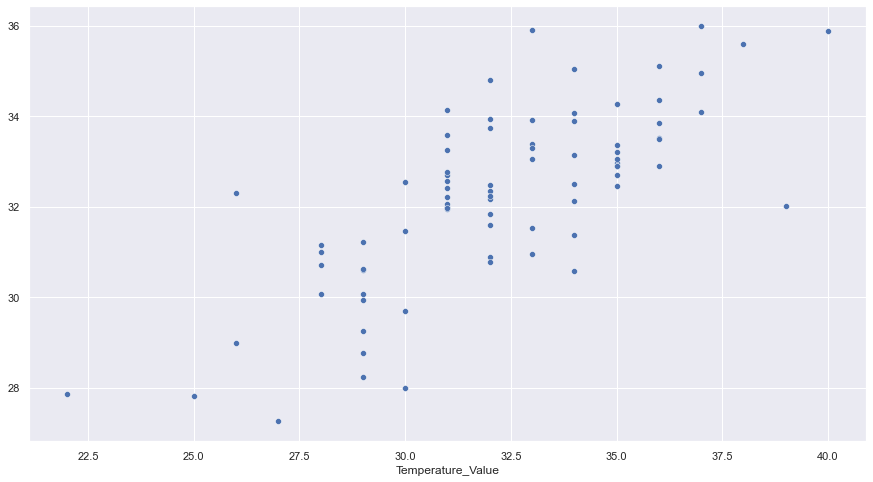

In [231]:
sns.scatterplot(y_test,en_pred)

In [232]:
residuals=y_test-en_pred

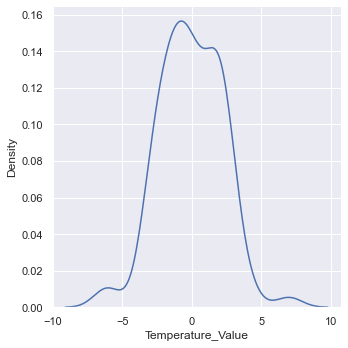

In [234]:
sns.displot(residuals,kind='kde')

In [235]:
score=r2_score(y_test,en_pred)

In [236]:
score

0.5335193798282668

In [237]:
#Adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4580592795063688